# Comprehensive Overview of the Advertisements Dataset

In [49]:
# imports
import numpy as np
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
# Read images and read all sizes?
# plot image sizes
image_path_list = []
hw_list = []
for image_path in glob.glob('./dataset/*/*/*.*'):
    image_path_list.append(image_path)
    with Image.open(image_path) as img:
        width, height = img.size
        hw_list.append([width, height])

Total_number_images = len(image_path_list)
print(f'This dataset has {len(image_path_list)} images.')


This dataset has 377 images.


### Overview

The dataset consists of **377 images** of advertisements collected from various sources. 

The dataset size is 35.2 MB.

Each image encapsulates a piece of visual marketing content, typically comprising a background image or illustration coupled with an advertisement sentence or text overlay.  

The images serve as artifacts of historical and contemporary advertising campaigns, providing insights into prevailing marketing trends and consumer preferences.

### Dataset Samples

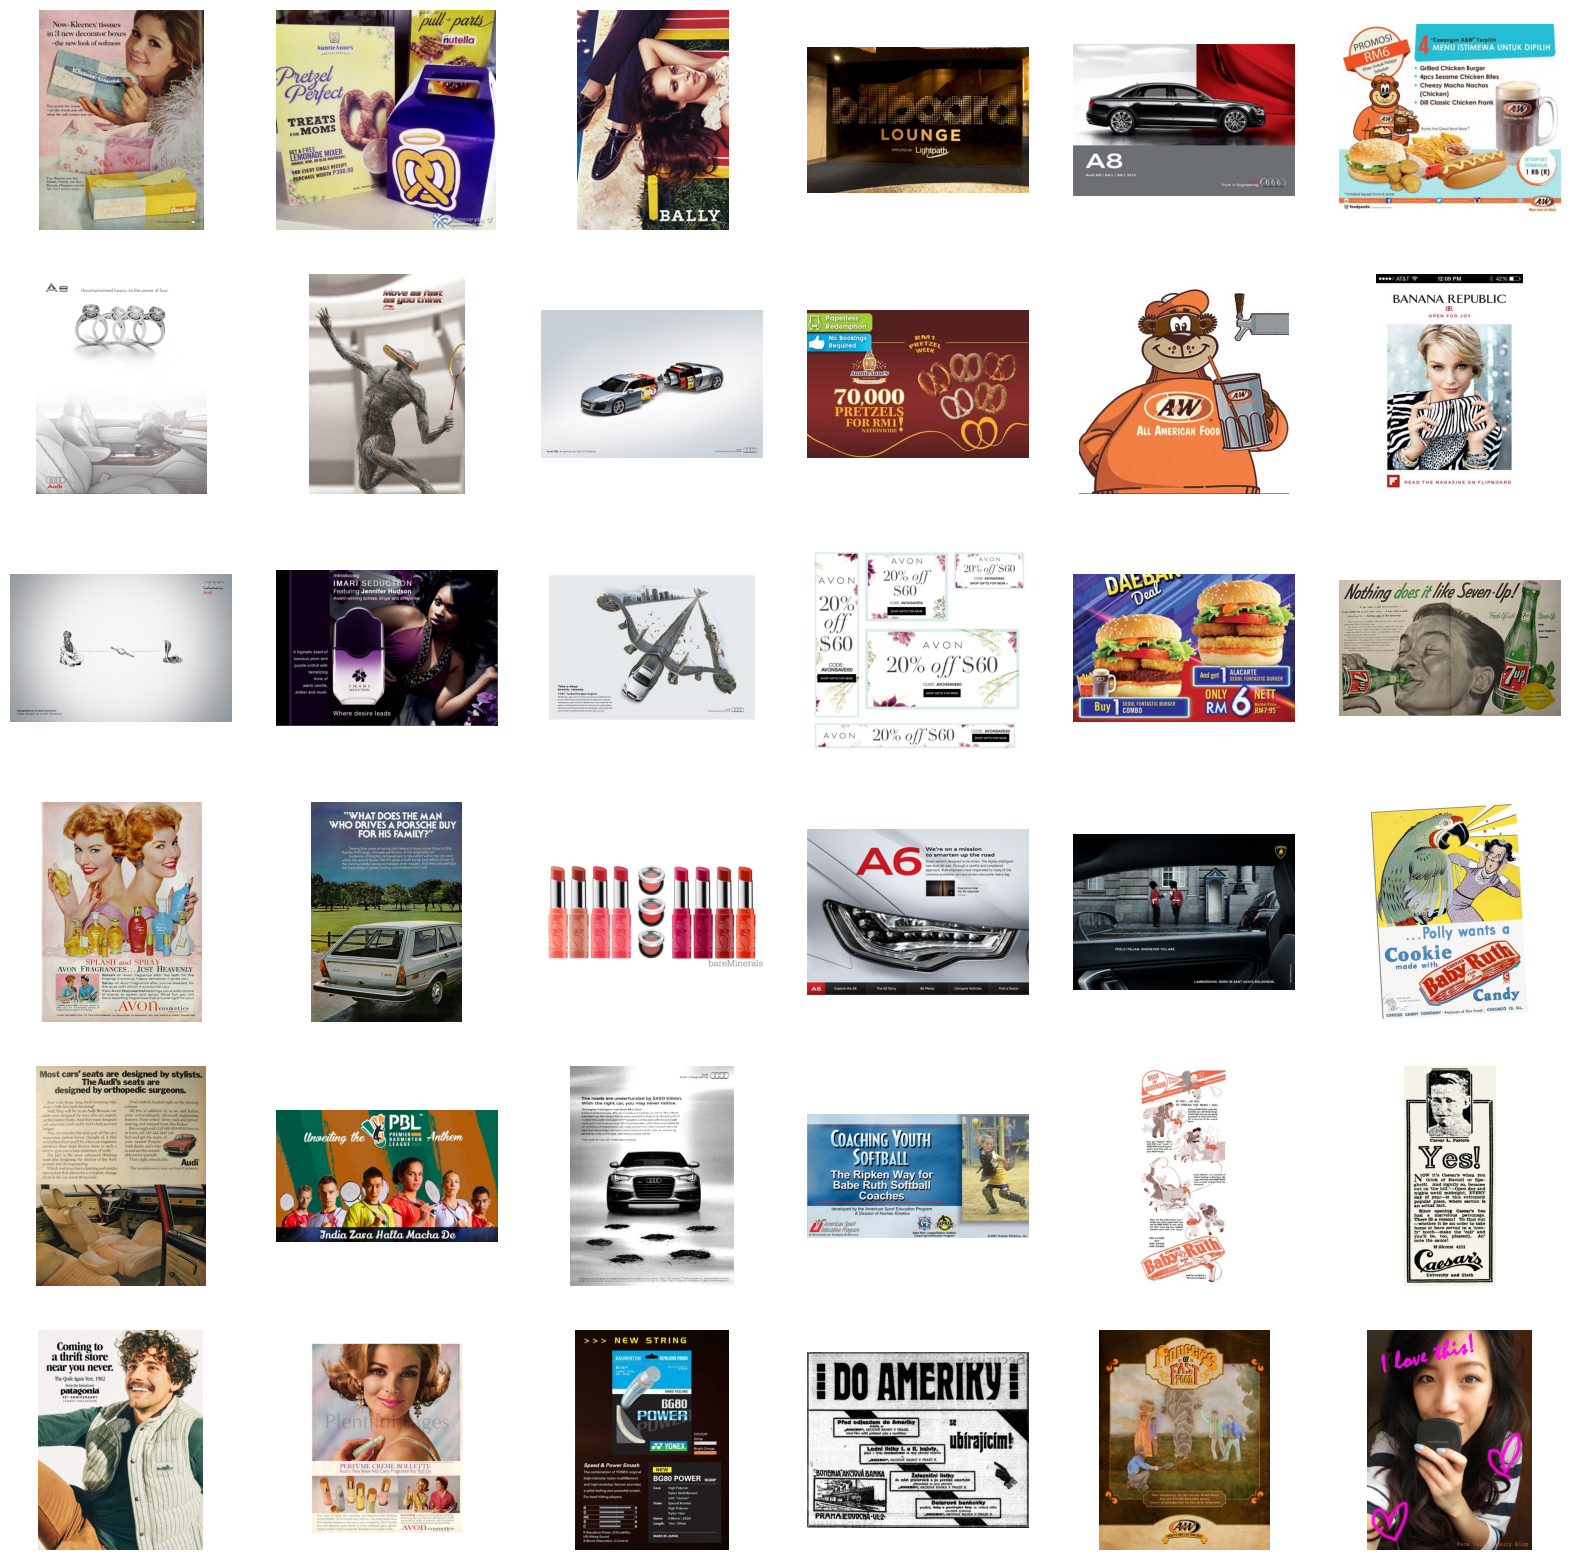

In [51]:
# Randomize the samples
fig = plt.gcf()
fig.set_size_inches(20, 20)
for i, img_path in enumerate(image_path_list[:36]):
    sp = plt.subplot(6, 6, i + 1)
    sp.axis('Off')
    img = Image.open(img_path)
    plt.imshow(img)

### Insightful Visualization: Exploring Dataset Variation Through Image Dimensions
Visualizing image dimensions in a scatter plot provides an insightful overview of the dataset's variation in height and width.
Each point represents an image.

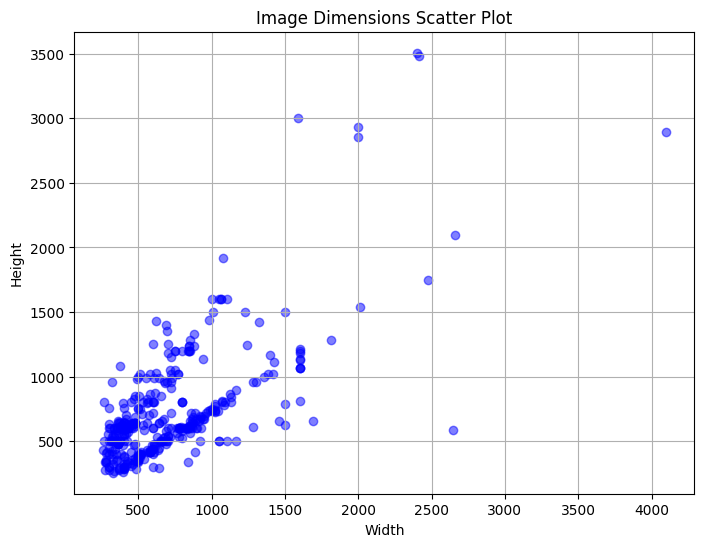

In [52]:
# Extract height and width from the list of image dimensions
heights = [dim[0] for dim in hw_list]
widths = [dim[1] for dim in hw_list]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, color='blue', alpha=0.5)
plt.title('Image Dimensions Scatter Plot')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()

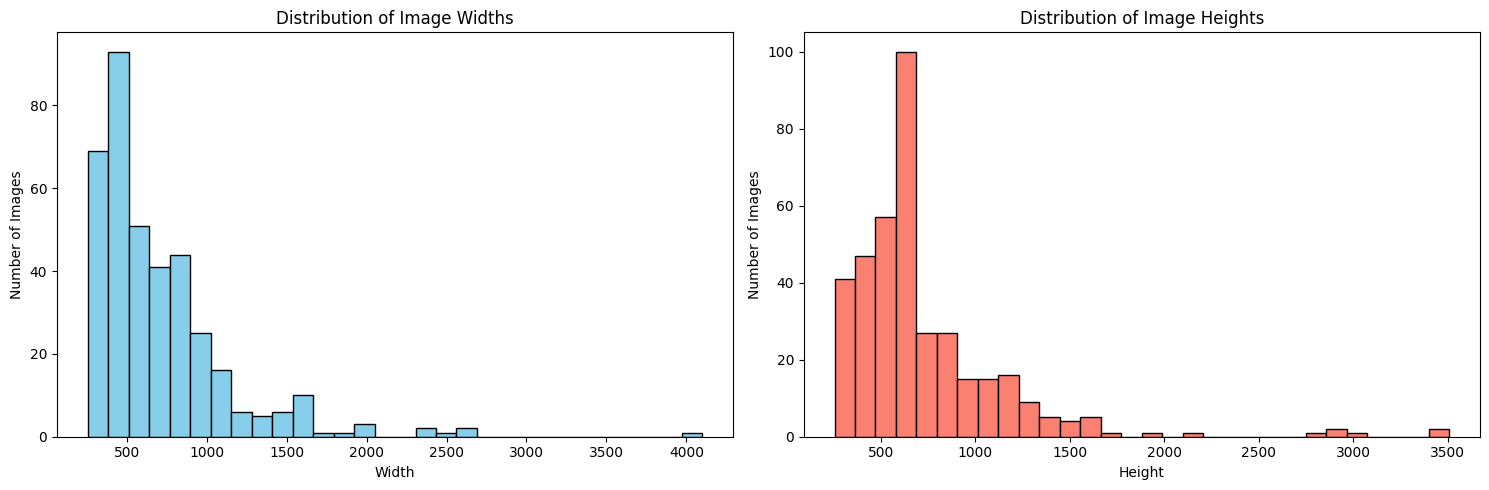

In [53]:
# Plotting distribution of widths and heights
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting widths
ax[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Image Widths')
ax[0].set_xlabel('Width')
ax[0].set_ylabel('Number of Images')

# Plotting heights
ax[1].hist(heights, bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Image Heights')
ax[1].set_xlabel('Height')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

Note: Images in the dataset have varying sizes.

###  Extracting Textual Content with OCR for Dataset Understanding
Given that nearly all images within the dataset contain text in the foreground, Optical Character Recognition (OCR) using Tesseract will be utilized to extract textual content, enabling comprehensive analysis and understanding of the dataset's textual components.

In [55]:
import pytesseract

image_dir = './dataset'

# Directory where you want to save the .txt files
output_dir = './dataset_text'

# Loop through each image file in the directory
for image_path in image_path_list:
        image = Image.open(image_path)
        
        # Extract text from the image
        extracted_text = pytesseract.image_to_string(image)

        # Close the image
        image.close()
        
        # Save the extracted text
        text_file_path = os.path.join(output_dir, os.path.basename(image_path) + '.txt')

        with open(text_file_path, 'w') as text_file:
            text_file.write(extracted_text)

        print(f"Text extracted from {image_path} and saved to {text_file_path}")

In [56]:
# examples of the extracted text
sample_text_path = 'dataset_text/350.jpg.txt'

with open(sample_text_path, 'r') as file:
        # Read the contents into a string
        file_contents = file.read()

print(file_contents.strip())

epick up our tele:
‘phone and dial an aie
line reservation number.

Bat instead of geting
recording asking you 9
‘wait, you get one offering
tohelp.

‘Youthen entera

MADE THE TELEPHONE |
In fact, right now, the

MAKING THE COMPUTER ©
power of a computer with

the sound of your voice.

puter?

      

seven-digit identification | and computers. reservations, administra- Each is becoming the
conde (suchas yourphone |" Werecreating data | on, et, other And becoming. in
number networks that do even magineifallthese | the process, more usetal
Youenterthe day | moreforinformation than | workedasonenetworkin | that ever betore
and month you want tofly. | our telephone network ‘concert with the data
‘You press buttons does for your voice. networks at car rental and
toindicateyourplace of | “These arenetworks | hotel chains.
departure. that not only move in “Travel wouldbe easier
Others toindicate your | formation instantly, but than you ever thought
destination, Thenumber | alsointerpetit,rea

By extracting text from images and incorporating it into your dataset's embedding process, you enrich the dataset with textual context, which can significantly enhance the search functionality.

### Show image samples next to extracted text

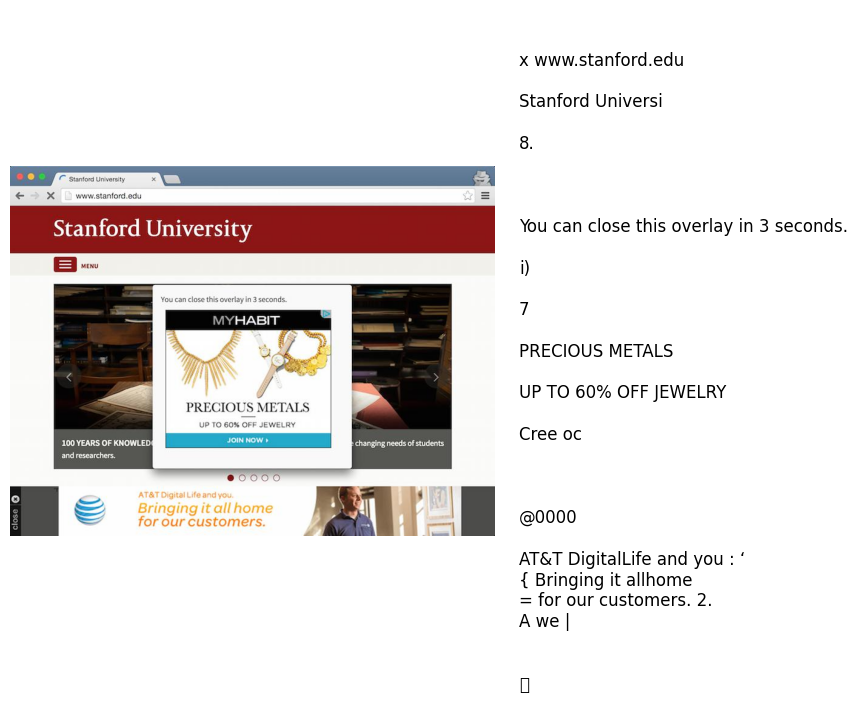

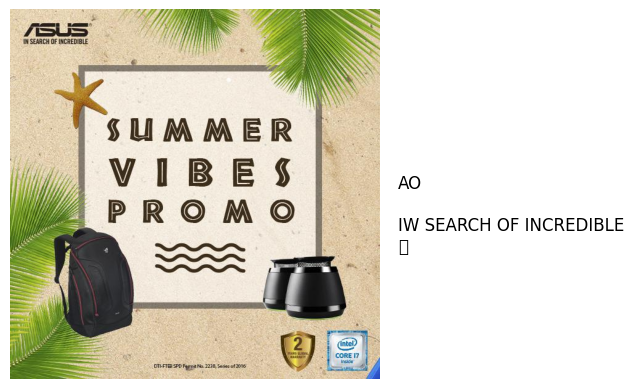

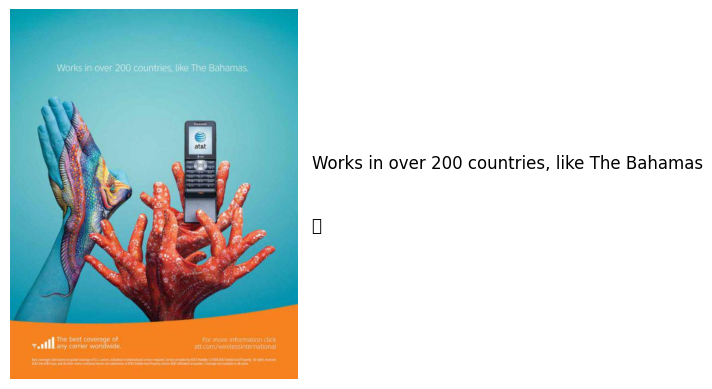

In [57]:
# Show image examples with text:

import matplotlib.pyplot as plt
from PIL import Image

# TODO clean extracted text

# Image examples are manually chosen
image_expl = ['dataset/subfolder-0/0/230.jpg', 'dataset/subfolder-0/0/50.jpg', 'dataset/subfolder-0/0/240.jpg']
corresponding_text_expl = ['dataset_text/230.jpg.txt', 'dataset_text/50.jpg.txt', 'dataset_text/240.jpg.txt']

# Open the file
for i in range(len(corresponding_text_expl)):
    with open(corresponding_text_expl[i], 'r') as file:
        # Read the contents into a string
        file_contents = file.read()

    image_path = image_expl[i]
    image = Image.open(image_path)

    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')

    # Display description next to the image
    ax.text(1.05, 0.5, file_contents, verticalalignment='center', transform=ax.transAxes, fontsize=12)

    plt.show()

### Note
We can refine the extracted text and integrate it into the vector database to enhance the search functionality and facilitate easier retrieval of relevant information.

By incorporating the contextual information of each image into the embedding space, we can improve the search accuracy and enable more precise retrieval of images based on their content and associated textual descriptions.